### Name : Limalka Sadith
### Index No : 190538N

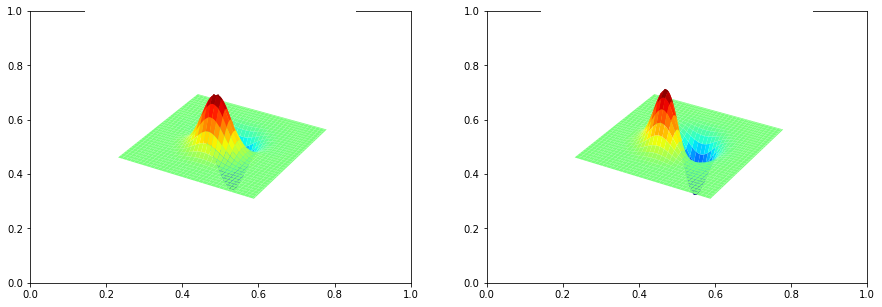

In [24]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

delta = 0.1

XX, YY = np.meshgrid(np.arange(-5,5+delta,delta), np.arange(-5,5+delta,delta))

sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /=np.sum(g)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
g_x = cv.filter2D(g,-1,sobel_v)
sobel_h = np.array([[-1,0,-1],[-2,0,2],[1,0,1]],dtype=np.float32)
g_y = cv.filter2D(g,-1,sobel_h)

fig,ax = plt.subplots(1,2,figsize=[15,5])
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')

ax1.axis("off")
ax2.axis("off")

surf1 = ax1.plot_surface(XX,YY,g_x,cmap=cm.jet,linewidth=0, antialiased = True)
surf2 = ax2.plot_surface(XX,YY,g_y,cmap=cm.jet,linewidth=0, antialiased = True)

plt.show()


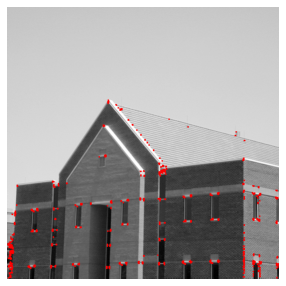

In [23]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('building.tif',cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

fig,ax = plt.subplots(figsize=[10,5])
ax.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

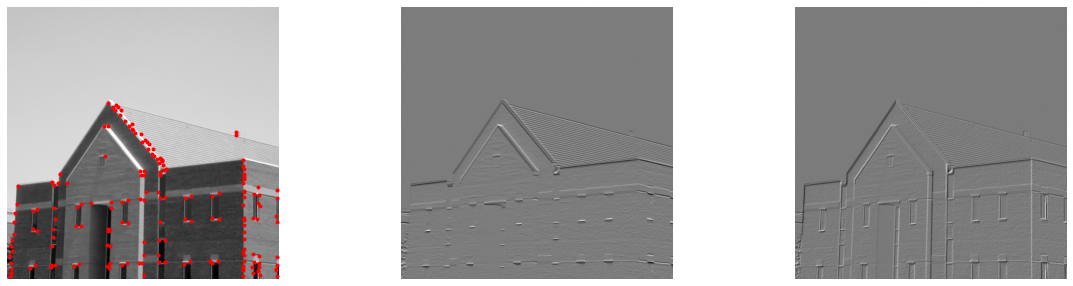

In [22]:
#Q3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from matplotlib import cm


img = cv.imread('building.tif',cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,-1],[-2,0,2],[1,0,1]],dtype=np.float32)

Ix =cv.filter2D(I,-1,sobel_v) 
Iy = cv.filter2D(I,-1,sobel_h)

sigma = 3
ksize= 7
m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22-m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e7] = 0
coordinates = peak_local_max(R,min_distance=2)

fig,ax = plt.subplots(1,3,figsize=[20,5])

ax[0].imshow(img,cmap='gray')
ax[0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[1].imshow(Ix+127,cmap='gray')
ax[2].imshow(Iy+127,cmap='gray')

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

plt.show()

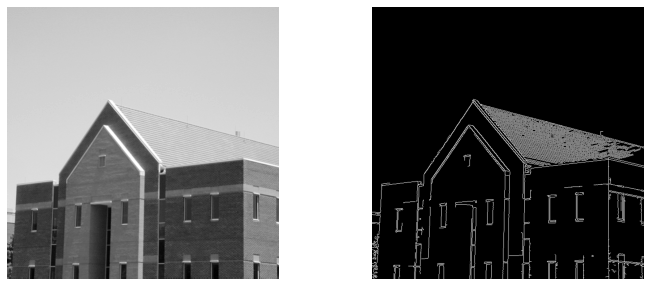

In [21]:
#Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building.tif',cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img,100,200)

fig,ax = plt.subplots(1,2,figsize=[12,5])

ax[0].imshow(img,cmap='gray')
ax[1].imshow(edges,cmap='gray')

ax[0].axis("off")
ax[1].axis("off")

plt.show()